<a href="https://colab.research.google.com/github/anwishn/ESAA_OB_23-1/blob/main/0526_%EC%BC%80%EB%9D%BC%EC%8A%A4_%EC%BA%90%EA%B8%80_%ED%95%84%EC%82%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.tensorflow.org/tutorials/keras/classification?hl=ko

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.12.0


# 패션 MNIST 데이터셋 임포트하기

MNIST 데이터셋은 손글씨 숫자(0, 1, 2 등)의 이미지로 이루어져 있습니다. 여기서 사용하려는 옷 이미지와 동일한 포맷입니다.

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


이미지는 28x28 크기의 넘파이 배열이고 픽셀 값은 0과 255 사이입니다. 레이블(label)은 0에서 9까지의 정수 배열입니다. 이 값은 이미지에 있는 옷의 클래스(class)

* 레이블	클래스
  + 0	T-shirt/top
  + 1	Trouser
  + 2	Pullover
  + 3	Dress
  + 4	Coat
  + 5	Sandal
  + 6	Shirt
  + 7	Sneaker
  + 8	Bag
  + 9	Ankle boot

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# 데이터 탐색

훈련 세트에 60,000개의 이미지가 있다는 것을 보여줍니다. 각 이미지는 28x28 픽셀로 표현

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

각 레이블은 0과 9사이의 정수

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

테스트 세트에는 10,000개의 이미지가 있습니다. 이 이미지도 28x28 픽셀로 표현

In [7]:
test_images.shape

(10000, 28, 28)

10,000개의 이미지에 대한 레이블

In [8]:
len(test_labels)

10000

# 데이터 전처리

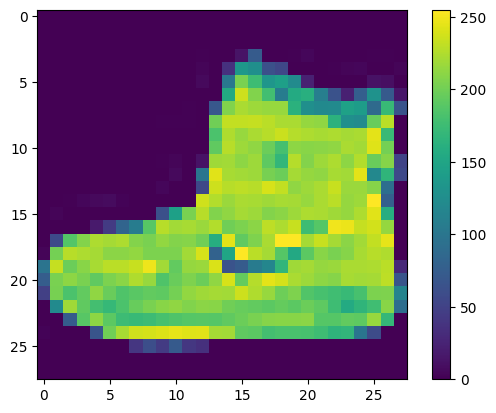

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

값의 범위를 0~1 사이로 조정

In [10]:
train_images = train_images / 255.0

test_images = test_images / 255.0

훈련 세트에서 처음 25개 이미지와 그 아래 클래스 이름을 출력

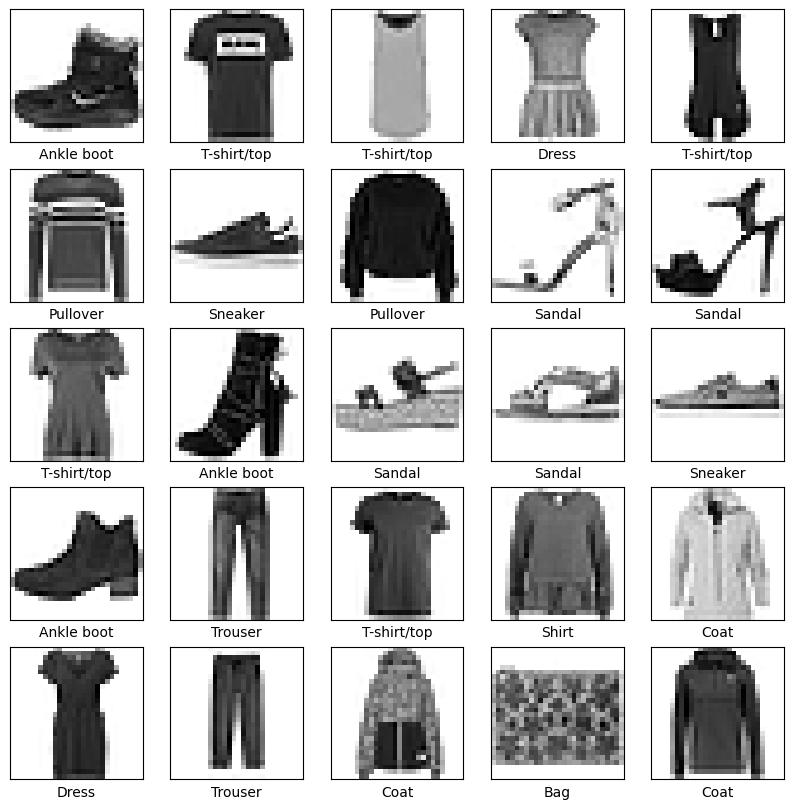

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# 모델 구성

## 층 설정

신경망의 기본 빌딩 블록은 레이어 

tf.keras.layers.Dense와 같은 층들의 가중치(parameter)는 훈련하는 동안 학습

* tf.keras.layers.Flatten은 2차원 배열(28 x 28 픽셀)의 이미지 포맷을 28 * 28 = 784 픽셀의 1차원 배열로 변환

* 두 개의 tf.keras.layers.Dense 층이 연속되어 연결. 밀집 연결(densely-connected) 또는 완전 연결(fully-connected) 층
  + 첫 번째 Dense 층은 128개의 노드(또는 뉴런)를 가집니다. 두 번째 (마지막) 층은 10개의 노드의 소프트맥스(softmax) 층입니다. 이 층은 10개의 확률을 반환하고 반환된 값의 전체 합은 1입니다. 각 노드는 현재 이미지가 10개 클래스 중 하나에 속할 확률을 출력

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

## 모델 컴파일

* 손실 함수 - 훈련 중 모델이 얼마나 정확한지 측정합니다. 모델을 올바른 방향으로 "조정"하려면 이 함수를 최소화해야 합니다.
* 옵티마이저 - 모델이 인식하는 데이터와 해당 손실 함수를 기반으로 모델이 업데이트되는 방식입니다.
* 메트릭 — 훈련 및 테스트 단계를 모니터링하는 데 사용됩니다. 다음 예에서는 올바르게 분류된 이미지의 비율인 정확도를 사용합니다.



In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# 모델 훈련

1. 훈련 데이터를 모델에 주입합니다-이 예에서는 train_images와 train_labels 배열입니다.
2. 모델이 이미지와 레이블을 매핑하는 방법을 배웁니다.
3. 테스트 세트에 대한 모델의 예측을 만듭니다-이 예에서는 test_images 배열입니다. 이 예측이 test_labels 배열의 레이블과 맞는지 확인합니다.
4. 예측이 test_labels 배열의 레이블과 일치하는지 확인합니다.

## 학습

model.fit 메서드를 호출

In [14]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.4987 - accuracy: 0.8238
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3732 - accuracy: 0.8655
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3358 - accuracy: 0.8767
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3138 - accuracy: 0.8847
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2958 - accuracy: 0.8895
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2814 - accuracy: 0.8957
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2695 - accuracy: 0.8997
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2590 - accuracy: 0.9026
Epoch 9/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.2478 - accuracy: 0.9070
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.23

## 정확도 평가

테스트 세트의 정확도가 훈련 세트의 정확도보다 조금 낮습니다. 훈련 세트의 정확도와 테스트 세트의 정확도 사이의 차이는 과대적합(overfitting) 때문

In [15]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3431 - accuracy: 0.8812 - 670ms/epoch - 2ms/step

Test accuracy: 0.8812000155448914


## 예측하기

소프트맥스 레이어를 연결하여 로짓을 해석하기 쉬운 확률로 변환

In [16]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [17]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [18]:
predictions[0]

array([1.09540025e-07, 6.12196160e-08, 2.39007125e-08, 4.04006109e-08,
       1.21007915e-08, 2.68907519e-04, 2.17863388e-07, 2.81939171e-02,
       1.51815371e-07, 9.71536458e-01], dtype=float32)

In [19]:
np.argmax(predictions[0])

9

In [20]:
test_labels[0]

9

In [21]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

## 예측 확인

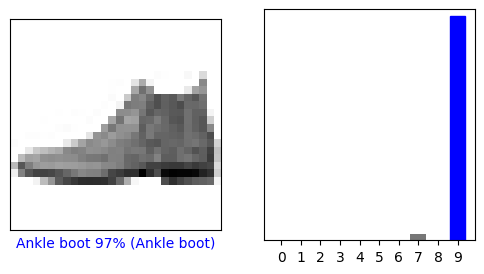

In [22]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

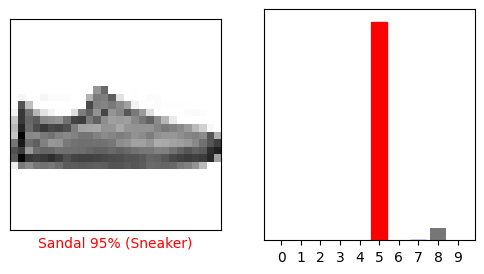

In [23]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

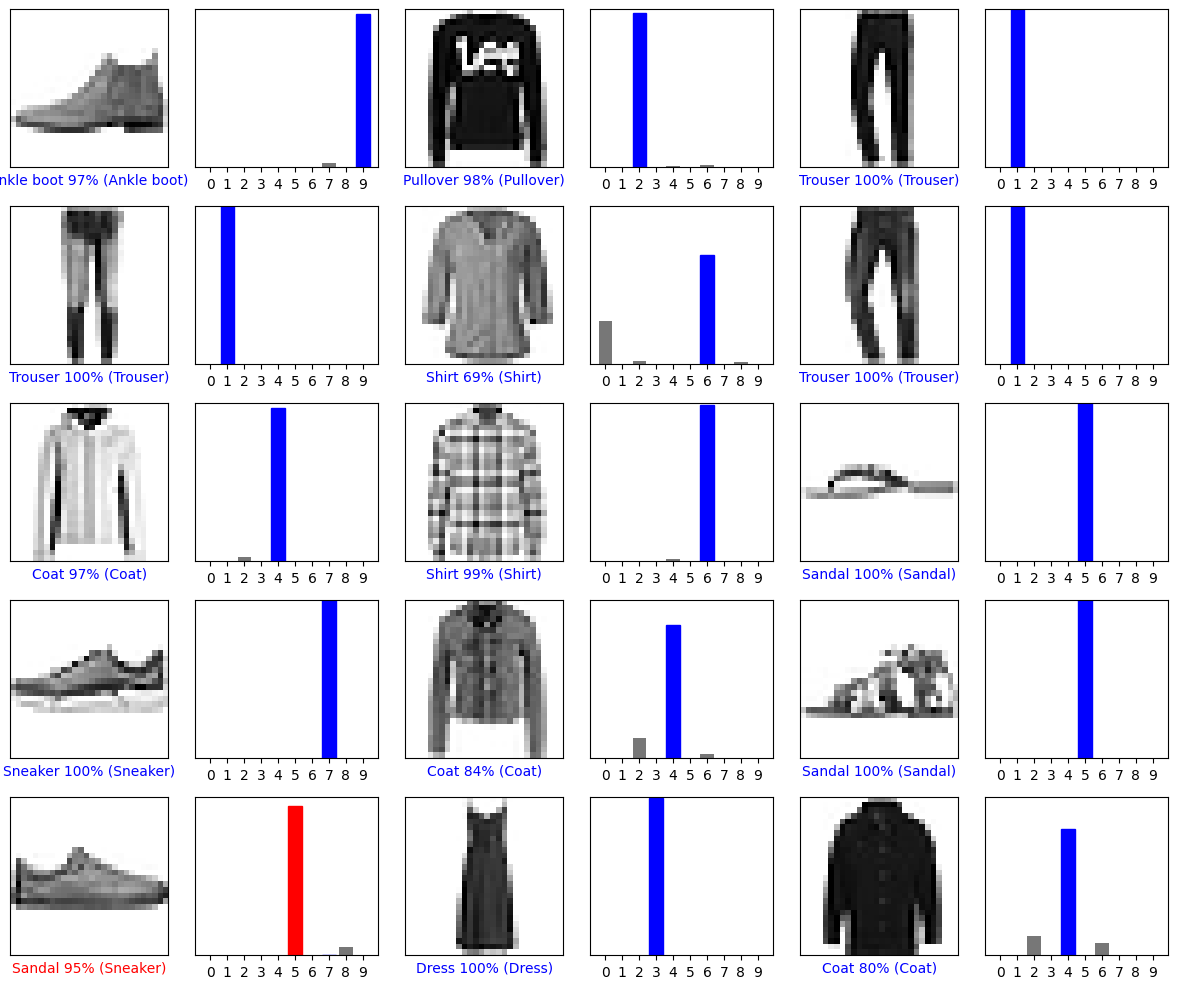

In [24]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

# 훈련된 모델 사용하기

In [25]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


tf.keras 모델은 한 번에 샘플의 묶음 또는 배치(batch)로 예측을 만드는데 최적화되어 있습니다. 하나의 이미지를 사용할 때에도 2차원 배열로 만들어야 합니다:

In [26]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [27]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 28ms/step
[[8.1736347e-05 1.1087242e-09 9.7686517e-01 6.4654358e-08 6.9288607e-03
  1.9674744e-11 1.6123872e-02 3.8628785e-14 2.1613222e-07 1.9233337e-09]]


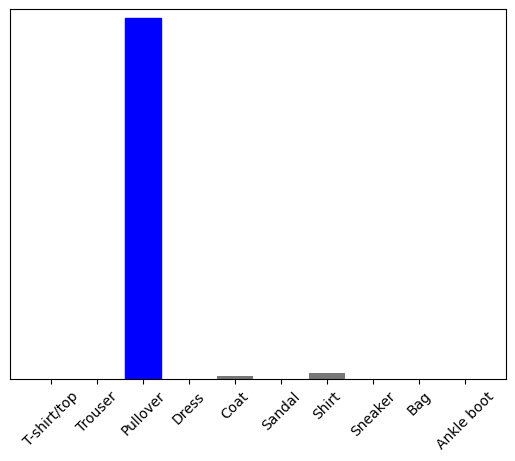

In [28]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

tf.keras.Model.predict는 데이터 배치의 각 이미지에 대해 하나의 목록씩 목록의 목록을 반환

In [29]:
np.argmax(predictions_single[0])

2